#Step 1: Download the dataset
In this first step, I will be installing the kaggle API, uploading my API token (kaggle.json) for access, moving the json file to the kaggle directory, setting needed permissions and then finally downloading the dataset "edumucelli/spotifys-worldwide-daily-song-ranking" from kaggle.

Next, I will be using the !head command to view the first few lines of the data

In [ ]:
#install kaggle api
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#upload the api token
from google.colab import files
files.upload()

In [ ]:
#moving the kaggle.json file to .kaggle directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle

In [ ]:
#setting permissions
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#downloading the dataset
!kaggle datasets download -d edumucelli/spotifys-worldwide-daily-song-ranking

 77% 33.0M/43.1M [00:00<00:00, 63.4MB/s]
100% 43.1M/43.1M [00:00<00:00, 77.1MB/s]


In [ ]:
#unzip the dataset
!unzip spotifys-worldwide-daily-song-ranking.zip

Archive:  spotifys-worldwide-daily-song-ranking.zip
  inflating: data.csv                


In [ ]:
#viewing the first 20 lines of the dataset
!head -n 20 data.csv

Position,Track Name,Artist,Streams,URL,Date,Region
1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAOSC1qTfo,2017-01-01,ec
2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6lroV2Kg,2017-01-01,ec
3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyVjxPOHdq,2017-01-01,ec
4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul3ywMe46,2017-01-01,ec
5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtcMZ4S4bO,2017-01-01,ec
6,La Bicicleta,Carlos Vives,12843,https://open.spotify.com/track/0sXvAOmXgjR2QUqLK1MltU,2017-01-01,ec
7,Ay Mi Dios,IAmChino,10986,https://open.spotify.com/track/6stYbAJgTszHAHZMPxWWCY,2017-01-01,ec
8,Andas En Mi Cabeza,Chino & Nacho,10653,https://open.spotify.com/track/5mey7CLLuFToM2P68Qu1gF,2017-01-01,ec
9,Traicionera,Sebastian Yatra,9807,https://open.spotify.com/track/5J1c3M4EldCfNxXwrwt8mT,2017-01-01,ec
10,Shaky Shaky,Daddy Yankee,

#Step 2: Create a Database to Store the Data
In this second step, I will be creating a database named 'spotify.db', and creating a table named 'songs' to store the data from the downloaded 'data.csv' file. This will be done using SQL in the colab terminal.

In [ ]:
#install terminal
!pip install colab-xterm
%load_ext colabxterm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 KB 4.5 MB/s eta 0:00:00


In [ ]:
#load terminal
%xterm

#install sqlite3 using the command sudo apt-get install sqlite3
#create database using the command .open spotify.db
#create table using, CREATE TABLE songs (
    Position INTEGER,
    Track TEXT,
    Artist TEXT,
    Streams INTEGER,
    URL TEXT,
    Date TEXT,
    Region
);

Launching Xterm...

<IPython.core.display.Javascript object>

#Step 3: Insert Data Into the Database
In this third step, I will be inserting the data from the downloaded file 'data.csv' into the database.

In [ ]:
#launching terminal
%xterm

#codes used to insert data from the csv file into the data
'''.open spotify.db
   .mode csv
   .import data.csv songs
'''

Launching Xterm...

<IPython.core.display.Javascript object>

#Step 4: Connect to the database using Python and retrieve the data from the tables using SQL.
In the fourth step, I will be connecting to the "spotify.db" and retrieving the
data from the "songs" table using the "fetchall()" or "fetchmany()" command as the case maybe.



In [ ]:
#import the library
import sqlite3
#connect to the database
conn = sqlite3.connect('spotify.db')

#create a cursor object
cursor = conn.cursor()

#select the data from the table songs
cursor.execute("SELECT * FROM songs")

#fetching some rows only because the data is very large
rows = cursor.fetchmany(20)

#print the rows
for row in rows:
    print(row)

#close the cursor and connection
cursor.close()
conn.close()

('Position', 'Track Name', 'Artist', 'Streams', 'URL', 'Date', 'Region')
(1, 'Reggaetón Lento (Bailemos)', 'CNCO', 19272, 'https://open.spotify.com/track/3AEZUABDXNtecAOSC1qTfo', '2017-01-01', 'ec')
(2, 'Chantaje', 'Shakira', 19270, 'https://open.spotify.com/track/6mICuAdrwEjh6Y6lroV2Kg', '2017-01-01', 'ec')
(3, 'Otra Vez (feat. J Balvin)', 'Zion & Lennox', 15761, 'https://open.spotify.com/track/3QwBODjSEzelZyVjxPOHdq', '2017-01-01', 'ec')
(4, "Vente Pa' Ca", 'Ricky Martin', 14954, 'https://open.spotify.com/track/7DM4BPaS7uofFul3ywMe46', '2017-01-01', 'ec')
(5, 'Safari', 'J Balvin', 14269, 'https://open.spotify.com/track/6rQSrBHf7HlZjtcMZ4S4bO', '2017-01-01', 'ec')
(6, 'La Bicicleta', 'Carlos Vives', 12843, 'https://open.spotify.com/track/0sXvAOmXgjR2QUqLK1MltU', '2017-01-01', 'ec')
(7, 'Ay Mi Dios', 'IAmChino', 10986, 'https://open.spotify.com/track/6stYbAJgTszHAHZMPxWWCY', '2017-01-01', 'ec')
(8, 'Andas En Mi Cabeza', 'Chino & Nacho', 10653, 'https://open.spotify.com/track/5mey7CLLuF

#Step 5: Save the Data Into a Pandas Dataframe
In this fifth step, I will be saving the data from the 'songs' table of the 'spotify.db' database into a Pandas Dataframe.

In [ ]:
#import the pandas library
import pandas as pd

#connect to the database
conn = sqlite3.connect('spotify.db')

#query the database and save the results into a dataframe
#selecting all columns except URL
spotify_df = pd.read_sql_query("SELECT Position, Track, Artist, Streams, Date, Region FROM songs", conn)

#close the connection
conn.close()

#display first five rows of the dataframe
spotify_df.head()

,Position,Track,Artist,Streams,Date,Region
0,Position,Track Name,Artist,Streams,Date,Region
1,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,ec
2,2,Chantaje,Shakira,19270,2017-01-01,ec
3,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,2017-01-01,ec
4,4,Vente Pa' Ca,Ricky Martin,14954,2017-01-01,ec


In [ ]:
#dropping first row
spotify_df = spotify_df.tail(-1)
spotify_df.head(2)

,Position,Track,Artist,Streams,Date,Region
1,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,ec
2,2,Chantaje,Shakira,19270,2017-01-01,ec


#Step 6: Perform Exploratory Data Analysis (EDA) on the Data to Understand the Distribution, Trends, and Relationships Among Variables.
In this sixth step, I will be performing some EDA on the data so as to understand the distribution, trends, and relationships among variables. I will also be doing some cleaning if necessary. By the end of this step, I should have garnered insights, ready for analysis.

In [ ]:
#how many rows and columns does my dataset contain?
shape = spotify_df.shape
print(f"Your dataset contains {shape[0]} rows and {shape[1]} columns")

Your dataset contains 3441197 rows and 6 columns


In [ ]:
#are there are missing values?
spotify_df.isna().sum()

Position    0
Track       0
Artist      0
Streams     0
Date        0
Region      0
dtype: int64

In [ ]:
#what dtypes are present?
spotify_df.dtypes

Position    object
Track       object
Artist      object
Streams     object
Date        object
Region      object
dtype: object

In [ ]:
#changing the datatype of Position and Streams to Integer
spotify_df[['Position', 'Streams']] = spotify_df[['Position', 'Streams']].astype(int)

In [ ]:
#setting date column as datetime object
spotify_df['Date'] = pd.to_datetime(spotify_df['Date'], format='%Y-%m-%d', errors='coerce')

In [ ]:
#confirming new dtypes
spotify_df.dtypes

Position             int64
Track               object
Artist              object
Streams              int64
Date        datetime64[ns]
Region              object
dtype: object

In [ ]:
#counting date values
spotify_df['Date'].value_counts()

2017-12-24    10073
2017-12-23     9904
2017-12-22     9895
2017-12-15     9834
2017-12-16     9794
              ...  
2017-01-04     8816
2017-01-03     8773
2017-01-02     8691
2017-01-08     8687
2017-01-01     8600
Name: Date, Length: 371, dtype: int64

In [ ]:
#unique date counts
spotify_df['Date'].unique()

array(['2017-01-01T00:00:00.000000000', '2017-01-02T00:00:00.000000000',
       '2017-01-03T00:00:00.000000000', '2017-01-04T00:00:00.000000000',
       '2017-01-05T00:00:00.000000000', '2017-01-06T00:00:00.000000000',
       '2017-01-07T00:00:00.000000000', '2017-01-08T00:00:00.000000000',
       '2017-01-09T00:00:00.000000000', '2017-01-10T00:00:00.000000000',
       '2017-01-11T00:00:00.000000000', '2017-01-12T00:00:00.000000000',
       '2017-01-13T00:00:00.000000000', '2017-01-14T00:00:00.000000000',
       '2017-01-15T00:00:00.000000000', '2017-01-16T00:00:00.000000000',
       '2017-01-17T00:00:00.000000000', '2017-01-18T00:00:00.000000000',
       '2017-01-19T00:00:00.000000000', '2017-01-20T00:00:00.000000000',
       '2017-01-21T00:00:00.000000000', '2017-01-22T00:00:00.000000000',
       '2017-01-23T00:00:00.000000000', '2017-01-24T00:00:00.000000000',
       '2017-01-25T00:00:00.000000000', '2017-01-26T00:00:00.000000000',
       '2017-01-27T00:00:00.000000000', '2017-01-28

In [ ]:
#retrieving the month, and year into separate columns from the date column
spotify_df['Month'] = spotify_df['Date'].dt.month
spotify_df['Year'] = spotify_df['Date'].dt.year

In [ ]:
#converting the month values from integer type to corresponding abbreviated month
import calendar
spotify_df['Month'] = spotify_df['Month'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
#creating a new column 'Season' from the column 'Month'
#defining a function to map each month to a season
def get_season(month):
    if month in ['Dec', 'Jan', 'Feb']:
        return 'Winter'
    elif month in ['Mar', 'Apr', 'May']:
        return 'Spring'
    elif month in ['Jun', 'Jul', 'Aug']:
        return 'Summer'
    elif month in ['Sep', 'Oct', 'Nov']:
        return 'Autumn'

#applying the function to the month column to create a new column season
spotify_df['Season'] = spotify_df['Month'].apply(get_season)

In [ ]:
#viewing first five rows of see new columns
spotify_df.head()

,Position,Track,Artist,Streams,Date,Region,Month,Year,Season
1,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,ec,Jan,2017,Winter
2,2,Chantaje,Shakira,19270,2017-01-01,ec,Jan,2017,Winter
3,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,2017-01-01,ec,Jan,2017,Winter
4,4,Vente Pa' Ca,Ricky Martin,14954,2017-01-01,ec,Jan,2017,Winter
5,5,Safari,J Balvin,14269,2017-01-01,ec,Jan,2017,Winter


In [ ]:
#what month in the year had the most spotify streams
spotify_df.Month.value_counts()

Jan    361156
Dec    297611
Jul    290808
Oct    289679
Aug    289439
Mar    285998
Nov    280280
Sep    280084
Apr    274391
Jun    269535
May    268024
Feb    254192
Name: Month, dtype: int64

In [ ]:
#how many unique years are present in the data?
spotify_df.Year.nunique()

2

In [ ]:
#what year had the most spotify streams
spotify_df.Year.value_counts()

2017    3356486
2018      84711
Name: Year, dtype: int64

In [ ]:
#how many unique regions are there
spotify_df.Region.nunique()

54

In [ ]:
#view unique regions
spotify_df.Region.unique()

array(['ec', 'fr', 'ar', 'fi', 'no', 'it', 'lt', 'ph', 'tw', 'nz', 'ee',
       'tr', 'us', 'sv', 'cr', 'de', 'cl', 'jp', 'br', 'hn', 'gt', 'ch',
       'hu', 'ca', 'pe', 'be', 'my', 'dk', 'bo', 'pl', 'at', 'pt', 'se',
       'mx', 'pa', 'uy', 'is', 'es', 'cz', 'ie', 'nl', 'sk', 'co', 'sg',
       'id', 'do', 'lu', 'gb', 'global', 'py', 'au', 'lv', 'gr', 'hk'],
      dtype=object)

In [ ]:
#Ecuador, france, argentina,finland, norway,italy, luthuania, philippines, taiwan, new zealand, estonia,
#Turkey, United States, el salvador, costa rica, germany,chile, japan, brazil, honduras,guatemala,Switzerland
#hungary, canada, peru, belgium, malaysia, denmark, bolivia, poland, austria, portugal, sweden
#mexico, panama, uruguay, iceland, spain, czech republic,ireland, netherlands, slovakia, colombia, singapore
#indonesia, dominican republic, luxembourg, great britain, paraguay, australia, latvia, greece, hong kong

In [ ]:
#replacing abbreviations in the regions column with country name
#spotify_df['Region'] = spotify_df['Region'].replace(
#   {'ec': 'Ecuador', 'fr': 'France', 'ar': 'Argentina', 'fi': 'Finland', 'no': 'Norway',
#     'it': 'Italy', 'lt': 'Luthuania', 'ph': 'Philippines', 'tw': 'Taiwan', 'nz': 'New Zealand',
#     'ee': 'Estonia', 'tr': 'Turkey',  'us': 'United States', 'sv': 'El Salvador', 'cr': 'Costa Rica',
#     'de': 'Germany', 'cl': 'Chile', 'jp': 'Japan', 'br': 'Brazil', 'hn': 'Honduras', 'gt': 'Guatemala',
#     'ch': 'Switzerland', 'hu': 'Hungary', 'ca': 'Canada', 'pe': 'Peru', 'be': 'Belgium', 'my': 'Malaysia',
#     'dk': 'Denmark', 'bo': 'Bolivia', 'pl': 'Poland', 'at': 'Austria', 'pt': 'Portugal', 'se': 'Sweden',
#     'mx': 'Mexico', 'pa': 'Panama', 'uy': 'Uruguay', 'is': 'Iceland', 'es': 'Spain', 'cz': 'Czech Republic',
#     'ie': 'Ireland', 'nl': 'Netherlands', 'sk': 'Slovakia', 'co': 'Colombia', 'sg': 'Singapore',
#     'id': 'Indonesia', 'do': 'Dominican Republic', 'lu': 'Luxembourg', 'gb': 'Great Britain', 'global': 'Global',
#     'py': 'Paraguay', 'au': 'Australia', 'lv': 'Latvia', 'gr': 'Greece', 'hk': 'Hong Kong'}
#     )

In [ ]:
#installing the python packages pycountry and pycountry_convert
#these packages will be used to convert country codes present in region to country names
#also to create a column of continents from the region's column
!pip install pycountry
!pip install pycountry_convert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 58.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681847 sha256=1dd7acb6aebd74ba77e9628e86e6191e9eb61e70a0537db69db193287f6f213d
  Stored in directory: /root/.cache/pip/wheels/47/15/92/e6dc85fcb0686c82e1edbcfdf80cfe4808c058813fed0baa8f
Successfully built pycountry
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.2/317.2 KB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 KB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#converting country codes in region column to country names
#import the package
import pycountry

#using pycountry to get country names
def get_country_name(code):
    if code is None:
        return None
    elif code == 'global':
        return 'Global'
    else:
        country = pycountry.countries.get(alpha_2=code.upper())
        if country:
            return country.name
        else:
            return None

In [ ]:
#converting country codes in region column to country names
#applying the function on the regions column
spotify_df['Region'] = spotify_df['Region'].apply(get_country_name)

#view unique values of region
spotify_df.Region.unique()

array(['Ecuador', 'France', 'Argentina', 'Finland', 'Norway', 'Italy',
       'Lithuania', 'Philippines', 'Taiwan, Province of China',
       'New Zealand', 'Estonia', 'Turkey', 'United States', 'El Salvador',
       'Costa Rica', 'Germany', 'Chile', 'Japan', 'Brazil', 'Honduras',
       'Guatemala', 'Switzerland', 'Hungary', 'Canada', 'Peru', 'Belgium',
       'Malaysia', 'Denmark', 'Bolivia, Plurinational State of', 'Poland',
       'Austria', 'Portugal', 'Sweden', 'Mexico', 'Panama', 'Uruguay',
       'Iceland', 'Spain', 'Czechia', 'Ireland', 'Netherlands',
       'Slovakia', 'Colombia', 'Singapore', 'Indonesia',
       'Dominican Republic', 'Luxembourg', 'United Kingdom', 'Global',
       'Paraguay', 'Australia', 'Latvia', 'Greece', 'Hong Kong'],
      dtype=object)

In [ ]:
#confirming number of unique values
spotify_df.Region.nunique()

54

In [ ]:
#converting country names into corresponding continent
#import the module
import pycountry_convert as pc

#defining a function to map each region to a continent
def get_continent(country):
    if country == 'Global':
        return 'Global'
    try:
        country_code = pc.country_name_to_country_alpha2(country)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent = pc.convert_continent_code_to_continent_name(continent_code)
        return continent

    except Exception as e:
        print(e)
        return None

In [ ]:
#converting country names into corresponding continent
#apply the function to the Country column to create a new Continent column
spotify_df['Continent'] = spotify_df['Region'].apply(get_continent)

In [ ]:
#what unique continents are present?
spotify_df['Continent'].unique()

array(['South America', 'Europe', 'Asia', 'Oceania', 'North America',
       'Global'], dtype=object)

In [ ]:
#how many unique continents are present including 'Global'?
spotify_df['Continent'].nunique()

6

In [ ]:
#how many unique artists are present?
spotify_df.Artist.nunique()

6629

In [ ]:
#checking the top most artists
spotify_df.Artist.value_counts()

Ed Sheeran                   127064
The Chainsmokers              68321
Drake                         49054
Calvin Harris                 38460
Imagine Dragons               37992
                              ...  
Adolf Fredriks Ungdomskör         1
Raiden                            1
Pauls Paris                       1
Jack & Jack                       1
帶菌者                               1
Name: Artist, Length: 6629, dtype: int64

In [ ]:
#how many unique tracks are present?
spotify_df.Track.nunique()

18598

In [ ]:
#what are the top most played tracks?
spotify_df.Track.value_counts()


Shape of You                               19365
Believer                                   16775
Despacito (Featuring Daddy Yankee)         16284
Something Just Like This                   16194
Rockabye (feat. Sean Paul & Anne-Marie)    16177
                                           ...  
Sweet Little Jesus Boy                         1
My Christmas Prayer                            1
Pretty Paper                                   1
What Child Is This?                            1
無期                                             1
Name: Track, Length: 18598, dtype: int64

In [ ]:
#What is the average number of streamings on spotify
average = round(spotify_df.Streams.mean(), 0)
print(f'The average number of streams on spotify is ', average)

The average number of streams on spotify is  51892.0


In [ ]:
#checking the uniqueness of position column
print(spotify_df.Position.nunique())
print(spotify_df.Position.count())

200
3441197


In [ ]:
#viewing the columns of the dataframe with the new additions
spotify_df.columns

Index(['Position', 'Track', 'Artist', 'Streams', 'Date', 'Region', 'Month',
       'Year', 'Season', 'Continent'],
      dtype='object')

In [ ]:
#how many columns are now present?
columns = spotify_df.shape[1]
print(f'The spotify_df DataFrame now contains {columns} columns')

The spotify_df DataFrame now contains 10 columns


In [ ]:
#rearranging the columns
new_order = ['Position', 'Artist', 'Track', 'Region', 'Continent', 'Streams', 'Date', 'Year', 'Month', 'Season']

#using reindex to change column order
spotify_df = spotify_df.reindex(columns=new_order)

#view head to confirm new order
spotify_df.head()

,Position,Artist,Track,Region,Continent,Streams,Date,Year,Month,Season
1,1,CNCO,Reggaetón Lento (Bailemos),Ecuador,South America,19272,2017-01-01,2017,Jan,Winter
2,2,Shakira,Chantaje,Ecuador,South America,19270,2017-01-01,2017,Jan,Winter
3,3,Zion & Lennox,Otra Vez (feat. J Balvin),Ecuador,South America,15761,2017-01-01,2017,Jan,Winter
4,4,Ricky Martin,Vente Pa' Ca,Ecuador,South America,14954,2017-01-01,2017,Jan,Winter
5,5,J Balvin,Safari,Ecuador,South America,14269,2017-01-01,2017,Jan,Winter


#Step 7: Visualize the data using matplotlib or seaborn(or with different libs)
In this seventh step, I will be telling some stories about the data with the help of visualizations.

## What are the Top Streaming Songs of All Time?

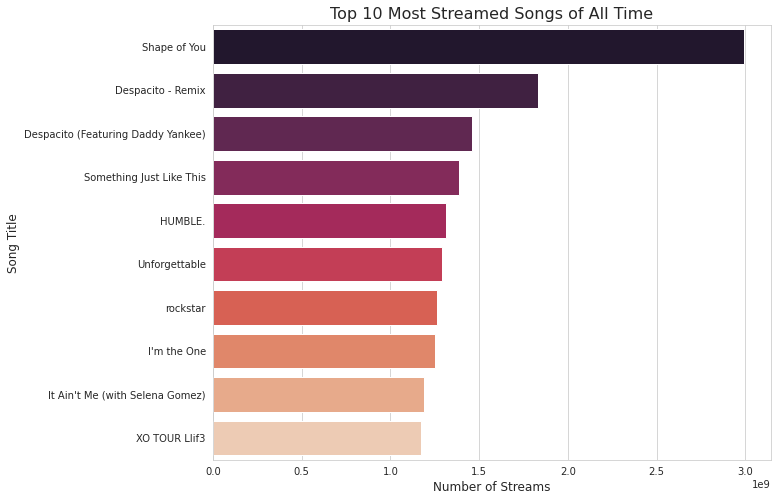

In [ ]:
#import the libraries
import seaborn as sns
import matplotlib.pyplot as plt

#group the data by 'Track', and 'Artist', and sum up the 'Streams' column

top_songs = spotify_df.groupby(['Track', 'Artist'])['Streams'].sum().reset_index()

#sort the DataFrame by total streams in descending order
top_songs = top_songs.sort_values('Streams', ascending=False)

#set the style of the plot
sns.set_style('whitegrid')

#create the plot
plt.figure(figsize=(10,8))
sns.barplot(x='Streams', y='Track', data=top_songs.head(10), palette='rocket')

#set the title and labels
plt.title('Top 10 Most Streamed Songs of All Time', fontsize=16)
plt.xlabel('Number of Streams', fontsize=12)
plt.ylabel('Song Title', fontsize=12)

#show the plot
plt.show()

## What is the Distribution of Streams Across Regions?

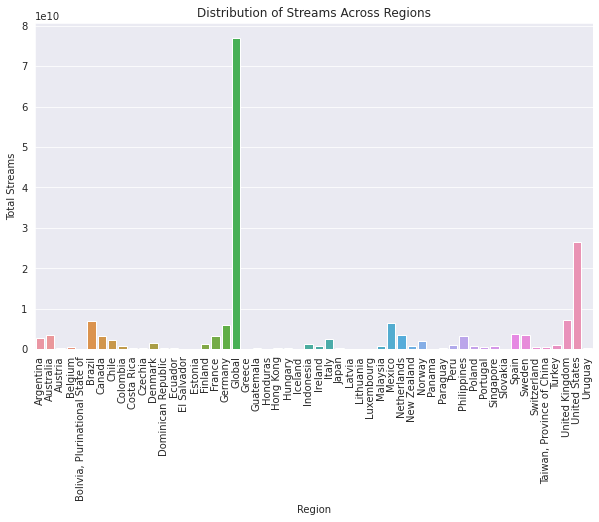

In [ ]:
#group data by region and compute total streams for each group
streams_by_region = spotify_df.groupby('Region')['Streams'].sum().reset_index()

#create a bar plot to visualize the distribution of the streams across regions
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Streams', data=streams_by_region)
plt.title('Distribution of Streams Across Regions')
plt.xlabel('Region')
plt.ylabel('Total Streams')
plt.xticks(rotation=90)

plt.show()

## How Does the Popularity of Songs and Artists Vary by Season or Time of the Year?

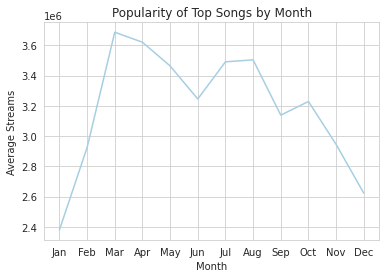

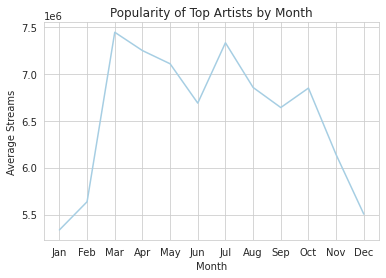

In [ ]:
#defining a list of month names in order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#adding the month column to the top_songs and top_artists group
top_songs = spotify_df.groupby(['Track', 'Artist', 'Month'])['Streams'].sum().reset_index()
top_artists = spotify_df.groupby(['Artist', 'Month'])['Streams'].sum().reset_index()

#setting month column to a categorical type with the desired order
top_songs['Month'] = pd.Categorical(top_songs['Month'], categories=month_order, ordered=True)
top_artists['Month'] = pd.Categorical(top_artists['Month'], categories=month_order, ordered=True)

#creating a line chart for top songs
sns.lineplot(x='Month', y='Streams', data=top_songs.groupby('Month')['Streams'].mean().reset_index())
plt.title('Popularity of Top Songs by Month')
plt.xlabel('Month')
plt.ylabel('Average Streams')

plt.show()

#creating a line chart for top artists
sns.lineplot(x='Month', y='Streams', data=top_artists.groupby('Month')['Streams'].mean().reset_index())
plt.title('Popularity of Top Artists by Month')
plt.xlabel('Month')
plt.ylabel('Average Streams')

plt.show()

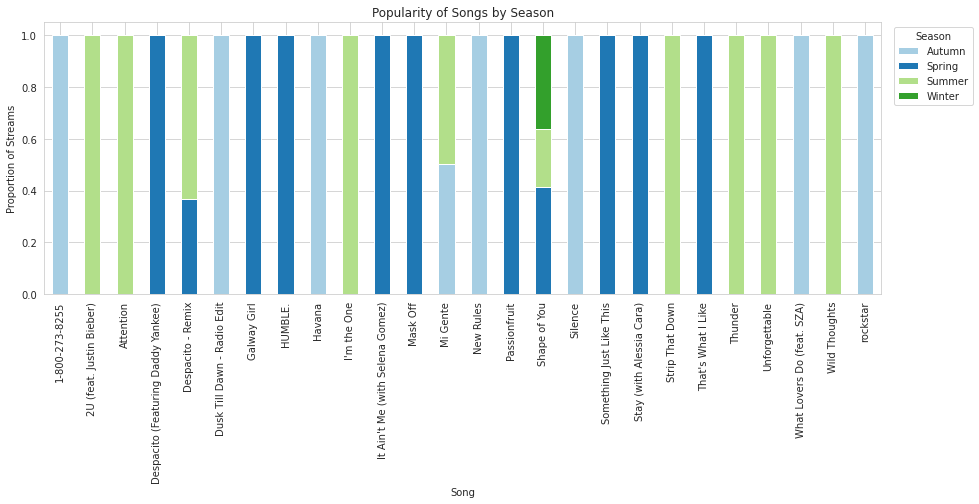

In [ ]:
#adding the season column to the top songs and artists group
top_songs_artists = spotify_df.groupby(['Track', 'Artist', 'Season'])['Streams'].sum().nlargest(30).reset_index()

#creating a pivot table to aggregate the total streams by season for each song
song_season_pivot = top_songs_artists.pivot(index='Track', columns='Season', values='Streams')

#normalizing the pivot table by dividing each row by the sum of its values
song_season_norm = song_season_pivot.div(song_season_pivot.sum(axis=1), axis=0)

#plotting a stacked bar chart for the normalized pivot table
sns.set_palette(sns.color_palette("Paired", 4))
song_season_norm.plot(kind='bar', stacked=True, figsize=(15, 5))
plt.title("Popularity of Songs by Season")
plt.ylabel("Proportion of Streams")
plt.xlabel("Song")
plt.legend(title="Season", bbox_to_anchor=(1.01, 1), loc="upper left")
plt.show()

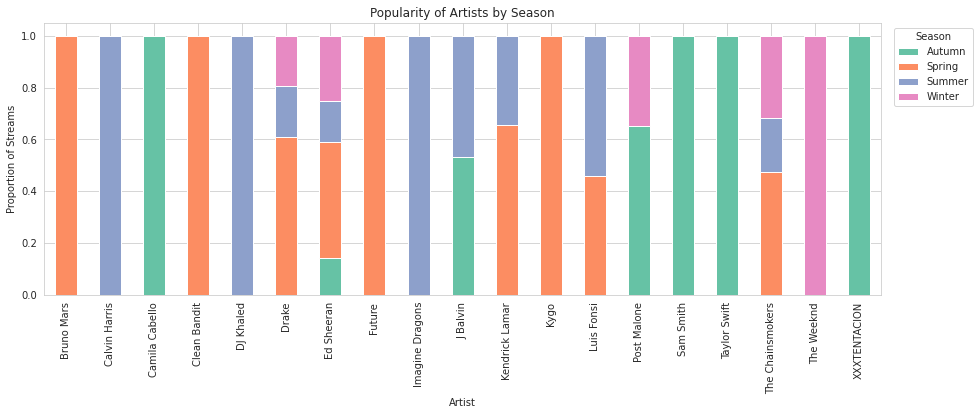

In [ ]:
#popularity of top artists by season
#grouping by artist and season and summing the streams
artist_season = spotify_df.groupby(['Artist', 'Season'])['Streams'].sum().nlargest(30).reset_index()

#creating a pivot table to aggregate the total streams by season for each song
artist_season_pivot = artist_season.pivot(index='Artist', columns='Season', values='Streams')

#normalizing the pivot table by dividing each row by the sum of its values
artist_season_norm = artist_season_pivot.div(artist_season_pivot.sum(axis=1), axis=0)

#plotting a stacked bar chart for the normalized pivot table
sns.set_palette(sns.color_palette("Set2", 4))
artist_season_norm.plot(kind='bar', stacked=True, figsize=(15, 5))
plt.title("Popularity of Artists by Season")
plt.ylabel("Proportion of Streams")
plt.xlabel("Artist")
plt.legend(title="Season", bbox_to_anchor=(1.01, 1), loc="upper left")
plt.show()

## What is the Correlation Between the Number of Streams and the Position on the Chart?

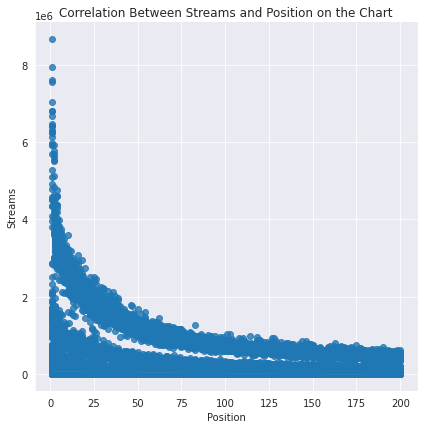

In [ ]:
#import random to randomly select a small sample
import random

#randomly select 10% of the rows
sample_size = int(0.1 * len(spotify_df))
random_indices = random.sample(range(len(spotify_df)), sample_size)
spotify_df_sample = spotify_df.iloc[random_indices]
#creating a scatterplot to show relationship
sns.lmplot(x='Position', y='Streams', data=spotify_df_sample, height=6)
plt.title('Correlation Between Streams and Position on the Chart')
plt.xlabel('Position')
plt.ylabel('Streams')

plt.show()

## Do Continents Share Same Top Ranking Songs or Artists?

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Creating a bubble plot
import plotly.express as px

#grouping the dataframe by continent and track, and summing the streams for each group
grouped_data = spotify_df.groupby(['Continent', 'Artist', 'Track']).agg({'Streams': 'sum', 'Position': 'min', 'Region': 'unique'}).reset_index()

#calculating the popularity score based on the total streams and the minimum position
grouped_data['Popularity_Score'] = grouped_data['Streams']/grouped_data['Position']

#applying a lambda function to the 'Region' column to count the number of unique regions for each group
grouped_data['Region_Count'] = grouped_data['Region'].apply(lambda x: len(set(x)))

#selecting the top 10 tracks and artists by total streams for each continent
top_tracks_artists = grouped_data.groupby('Continent').apply(lambda x: x.nlargest(10, 'Popularity_Score')).reset_index(drop=True)

#creating bubble chart
fig = px.scatter(top_tracks_artists, x='Streams', y='Popularity_Score', size='Region_Count', size_max=80, color='Continent', \
                 hover_data=['Artist', 'Track', 'Region'], text=top_tracks_artists['Artist'] + ' - ' + top_tracks_artists['Track'])
fig.update_traces(textposition='top center', textfont_size=16)
fig.update_layout(title='Top 10 Ranking Songs/Artists by Continent')
fig.show()


#Step 8: Performing Topic Modeling on the Artist and Track Columns
In this eighth step, I will be exploring trends and themes in Spotify's Worldwide Daily Ranking Songs Data through Topic Modelling and Word Cloud Visualization.

In [ ]:
#importing necessary libraries
import random
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import  STOPWORDS

#converting the track column to a list of strings
documents = spotify_df['Artist'].tolist()

#defining the stop words
stopwords = set(STOPWORDS)
stopwords.update(['an', 'or', 'on', 'in', 'en', 'tu', 'la', 'el', 'ty', 'mi', 'ao', 'mø',\
                  'te', 'let', 'ain', 'like', 'si', 'se', 'ign'])

#defining a function for text preprocessing
def preprocess(text):
    """
    Tokenizes and removes stop words from a given text.
    """
    return [token for token in simple_preprocess(text) if token not in stopwords]

#subsampling the documents
sample_size = 0.1
n_samples = int(len(documents) * sample_size)
random.seed(42)
sample_indices = random.sample(range(len(documents)), n_samples)
sampled_docs = [documents[i] for i in sample_indices]

#tokenizing and preprocessing the documents
processed_docs = [preprocess(doc) for doc in sampled_docs]

#creating a dictionary from the documents
dictionary = gensim.corpora.Dictionary(processed_docs)

#creating a corpus from the documents
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

#train an LDA model with 5 topics
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=5, id2word=dictionary)

#printing the topic and their top most frequent words
#for topic in lda_model.print_topics():
    #print('Topic {}: {}'.format(topic[0], ', '.join([word[0] for word in topic[1]])))
for i, topic in lda_model.show_topics(num_topics=5, formatted=False):
    print(f'Topic {i+1}: {topic}')

Topic 1: [('ed', 0.1151462), ('sheeran', 0.11508877), ('shawn', 0.03244214), ('mendes', 0.030707382), ('lazer', 0.029790208), ('major', 0.029790208), ('james', 0.024279041), ('kendrick', 0.024223415), ('lamar', 0.024033792), ('walker', 0.02348847)]
Topic 2: [('dj', 0.042329848), ('malone', 0.033156633), ('post', 0.03295372), ('ozuna', 0.029506236), ('kygo', 0.029170603), ('bruno', 0.024769742), ('mars', 0.024579402), ('snake', 0.020411734), ('khaled', 0.017754843), ('sebastian', 0.01607179)]
Topic 3: [('martin', 0.055048183), ('harris', 0.035010602), ('calvin', 0.034844354), ('luis', 0.033875473), ('fonsi', 0.03299703), ('garrix', 0.031706143), ('balvin', 0.030409638), ('bad', 0.024776831), ('bunny', 0.024383757), ('zayn', 0.022779843)]
Topic 4: [('dragons', 0.03344544), ('imagine', 0.033404827), ('weeknd', 0.03306487), ('lil', 0.028770238), ('charlie', 0.027464457), ('puth', 0.026877949), ('clean', 0.025969923), ('bandit', 0.025969923), ('sam', 0.017931718), ('future', 0.01749121)]
To

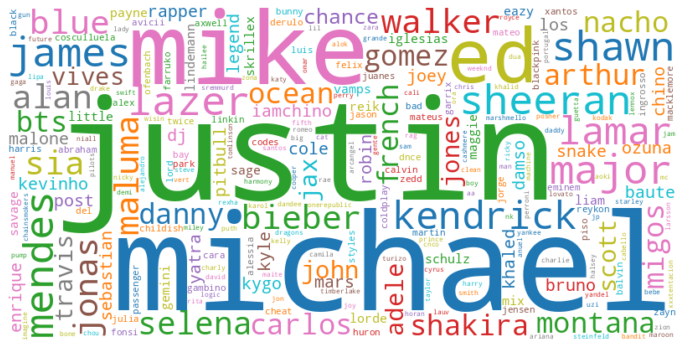

In [ ]:
#displaying the plot of topics in artist
from wordcloud import WordCloud

#getting the most frequent words for each topic
topics = lda_model.show_topics(num_topics=5, num_words=50, formatted=False)
words = [[word[0] for word in topic[1]] for topic in topics]

#combine all words into a single a single list
all_words = []
for topic_words in words:
    all_words.extend(topic_words)

#convert lists of words to a single string
text = ' '.join(all_words)

#create word cloud of all words
wc = WordCloud(width=800, height=400, background_color='white', max_words=500, colormap='tab10').generate(text)

#plot the word cloud
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show();

In [ ]:
#importing necessary libraries
import random
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import  STOPWORDS

#converting the track column to a list of strings
documents = spotify_df['Track'].tolist()

#defining the stop words
stopwords = set(STOPWORDS)
stopwords.update(['an', 'or', 'on', 'in', 'en', 'tu', 'la', 'el', 'ty', 'mi', 'ao', 'mø',\
                  'te', 'let', 'ain', 'like', 'si', 'se', 'ign'])

#defining a function for text preprocessing
def preprocess(text):
    """
    Tokenizes and removes stop words from a given text.
    """
    return [token for token in simple_preprocess(text) if token not in stopwords]

#subsampling the documents
sample_size = 0.1
n_samples = int(len(documents) * sample_size)
random.seed(42)
sample_indices = random.sample(range(len(documents)), n_samples)
sampled_docs = [documents[i] for i in sample_indices]

#tokenizing and preprocessing the documents
processed_docs = [preprocess(doc) for doc in sampled_docs]

#creating a dictionary from the documents
dictionary = gensim.corpora.Dictionary(processed_docs)

#creating a corpus from the documents
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

#train an LDA model with 5 topics
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=5, id2word=dictionary)

#printing the topic and their top most frequent words
#for topic in lda_model.print_topics():
    #print('Topic {}: {}'.format(topic[0], ', '.join([word[0] for word in topic[1]])))
for i, topic in lda_model.show_topics(num_topics=5, formatted=False):
    print(f'Topic {i+1}: {topic}')


Topic 1: [('feat', 0.07412784), ('remix', 0.02771038), ('dance', 0.019968566), ('shades', 0.017603183), ('darker', 0.01739238), ('original', 0.014724655), ('minaj', 0.012964396), ('nicki', 0.012964396), ('time', 0.012944229), ('good', 0.012829552)]
Topic 2: [('feat', 0.09229446), ('know', 0.02907768), ('feel', 0.025864217), ('remix', 0.018544586), ('cabello', 0.01345665), ('camila', 0.01345665), ('pa', 0.011836037), ('gucci', 0.011805113), ('amor', 0.011545198), ('version', 0.01132323)]
Topic 3: [('love', 0.066499434), ('feat', 0.05330322), ('remix', 0.037230402), ('despacito', 0.022992698), ('yankee', 0.018687442), ('daddy', 0.018624356), ('shape', 0.016204419), ('justin', 0.014911027), ('bieber', 0.014848375), ('cold', 0.013467865)]
Topic 4: [('radio', 0.023361627), ('que', 0.021687873), ('remix', 0.01896319), ('edit', 0.017409679), ('vivo', 0.017198738), ('song', 0.014905139), ('tú', 0.013249546), ('stay', 0.012738736), ('congratulations', 0.011146938), ('photograph', 0.010511054)]


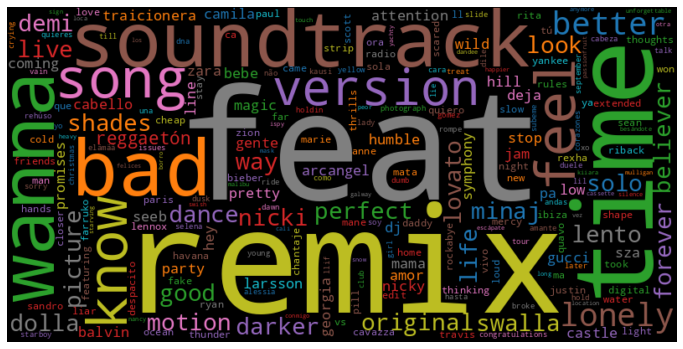

In [ ]:
#displaying the plot of topics in tracks
from wordcloud import WordCloud

#getting the most frequent words for each topic
topics = lda_model.show_topics(num_topics=5, num_words=50, formatted=False)
words = [[word[0] for word in topic[1]] for topic in topics]

#combine all words into a single a single list
all_words = []
for topic_words in words:
    all_words.extend(topic_words)

#convert lists of words to a single string
text = ' '.join(all_words)

#create word cloud of all words
wc = WordCloud(width=800, height=400, background_color='black', max_words=500, colormap='tab10').generate(text)

#plot the word cloud
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show();



# Step 9: Writing the results back into the dataframe
In this ninth step, I will be writing back the results from my analysis into new tables and saved to the database 'spotify.db'.

In [ ]:
#import the library
#connecting to the database
conn =sqlite3.connect('spotify.db')

#creating a new table for the modified data
new_table_name_1 = "modified_songs"
spotify_df[:0].to_sql(new_table_name_1, conn, if_exists='fail', index=False)

#writing the modified data into the modified_songs
spotify_df.to_sql(new_table_name_1, conn, if_exists='append', index=False)

#creating a new table for top songs
new_table_name_2 = "top_songs"
top_songs[:0].to_sql(new_table_name_2, conn, if_exists='fail', index=False)

#writing the top songs data into the top_songs
top_songs.to_sql(new_table_name_2, conn, if_exists='append', index=False)

#creating a new table for top artists
new_table_name_3 = "top_artists"
top_artists[:0].to_sql(new_table_name_3, conn, if_exists='fail', index=False)

#writing the top songs data into the top_songs
top_artists.to_sql(new_table_name_3, conn, if_exists='append', index=False)

#creating a new table for top_tracks_artists
new_table_name_4 = "top_tracks_artists"
top_tracks_artists[:0].to_sql(new_table_name_4, conn, if_exists='fail', index=False)

#writing the top tracks and artists data into the top_tracks_artists
top_tracks_artists.to_sql(new_table_name_4, conn, if_exists='append', index=False)

#creating a new table for top tracks by season
new_table_name_5 = "top_songs_season"
top_songs_artists[:0].to_sql(new_table_name_5, conn, if_exists='fail', index=False)

#writing the top tracks by season data into the top_songs_season
top_songs_artists.to_sql(new_table_name_5, conn, if_exists='append', index=False)

#creating a new table for artists by season
new_table_name_6 = "top_artists_season"
artist_season[:0].to_sql(new_table_name_6, conn, if_exists='fail', index=False)

#writing the artists by season data into the top_artists_season
artist_season.to_sql(new_table_name_6, conn, if_exists='append', index=False)

#creating a new table for streams by region
new_table_name_7 = "streams_by_region"
streams_by_region[:0].to_sql(new_table_name_7, conn, if_exists='fail', index=False)

#writing the top streams by region data into the streams by region
streams_by_region.to_sql(new_table_name_7, conn, if_exists='append', index=False)

#creating a new table for popularity of top songs and artists across continents
new_table_name_8 = "continental_songs_artists"
grouped_data[:0].to_sql(new_table_name_8, conn, if_exists='fail', index=False)

#writing the top artists and songs data across continents into the continental_songs_artists
grouped_data.to_sql(new_table_name_8, conn, if_exists='append', index=False)

#committing changes
conn.commit()

#closing the connection
conn.close()

In [ ]:
files.download('spotify.db')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Thank You!